### Gradient descent algorithm

1. Initialize variable x to any random number : $x_0 = \alpha$

2. Pick a value for the learning rate $\eta$.
    - If α is very small, it would take long time to converge.
    - If α is large, it may fail to converge and overshoot the minimum.
    

3. Repeat until convergense :  $ x_{t+1} = x_t - \eta ~ f'(x_t)$

### Simple Example
- Simple function : $f(x) = x^2 + 10sin(x)$
- Derivative function : $f'(x) = 2x + 10cos(x)$
- Gradient descent formula : $ x_{t+1} = x_t - \eta ~ (2x + 10cos(x)) $

In [34]:
# Cost function
def cost(x):
    return np.power(x, 2) + 10*np.sin(x)

# Derivative function
def grad(x):
    return np.dot(2, x) + 10*np.cos(x)

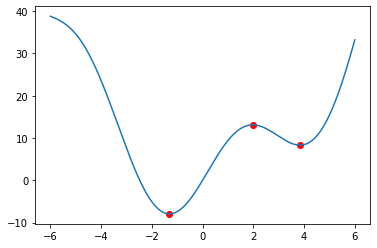

[-1.306440008369511, 3.837467106499049]


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Cost function
f = lambda x: x**2 + 10*np.sin(x)
X = np.linspace(-6, 6, 100000)
Y = [f(x) for x in X]

# Optimal point solve by 
# https://www.wolframalpha.com
x = [-1.3064400083695109598,
     3.8374671064990487198,
     1.9773830293288409831]

plt.scatter(x, cost(x), c='red')
plt.plot(X, Y); plt.show(); print(x[0:2])

In [36]:
# Gradient descent algorithm
def simpleGD(x0, eta, loop):
    x = [x0]
    for it in range(loop):
        x_new = x[-1] - eta*(grad(x[-1]))
        if abs(grad(x_new)) < 1e-3: break
        x.append(x_new)
    return (x, it)

In [37]:
(x, it) = simpleGD(5.0, .1, 100)
print('optimal point : %f, cost : %f, after %d iterations'%(x[-1], cost(x[-1]), it))

optimal point : 3.836788, cost : 8.315588, after 4 iterations


In [38]:
(x, it) = simpleGD(-5.0, .1, 100)
print('optimal point : %f, cost : %f, after %d iterations'%(x[-1], cost(x[-1]), it))

optimal point : -1.306528, cost : -7.945823, after 7 iterations


### Gradient descent alogorithm with momentum

1. Initialize variable x to any random number : $x_0 = \alpha$

2. Pick a value for the learning rate $\eta$.
    - If α is very small, it would take long time to converge.
    - If α is large, it may fail to converge and overshoot the minimum.
    

3. Repeat until convergense :  $ x_{t+1} = x_t - (\eta ~ f'(x_t) + \gamma x_{t-1})$

### Simple Example
- Simple function : $f(x) = x^2 + 10sin(x)$
- Derivative function : $f'(x) = 2x + 10cos(x)$
- Gradient descent formula : $ x_{t+1} = x_t - \eta ~ (2x + 10cos(x)) $

In [39]:
# Cost function
def cost(x):
    return np.power(x, 2) + 10*np.sin(x)

# Derivative function
def grad(x):
    return np.dot(2, x) + 10*np.cos(x)

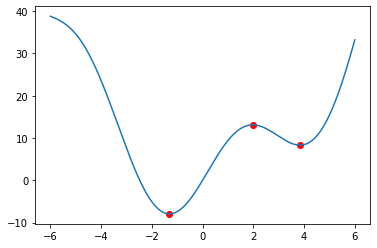

[-1.306440008369511, 3.837467106499049]


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Cost function
f = lambda x: x**2 + 10*np.sin(x)
X = np.linspace(-6, 6, 100000)
Y = [f(x) for x in X]

# Optimal point solve by 
# https://www.wolframalpha.com
x = [-1.3064400083695109598,
     3.8374671064990487198,
     1.9773830293288409831]

plt.scatter(x, cost(x), c='red')
plt.plot(X, Y); plt.show(); print(x[0:2])

In [41]:
# Gradient descent algorithm with momentum
def momentumGD(x0, eta, gamma, loop):
    x = [x0]; v = [np.zeros_like(x0)]
    
    for it in range(loop):
        v_new = gamma*v[-1] + eta*(grad(x[-1]))
        x_new = x[-1] - v_new
        if abs(grad(x_new)) < 1e-3: break
        x.append(x_new); v.append(v_new)
    return (x, it)

In [42]:
(x, it) = momentumGD(5.0, .1, .9, 1000)
print('optimal point : %f, cost : %f, after %d iterations'%(x[-1], cost(x[-1]), it))

optimal point : -1.305296, cost : -7.945816, after 147 iterations


### Nesterov accelerated gradient

1. Initialize variable x to any random number : $x_0 = \alpha$

2. Pick a value for the learning rate $\eta$.
    - If α is very small, it would take long time to converge.
    - If α is large, it may fail to converge and overshoot the minimum.


3. Repeat until convergense :  $ x_{t+1} = x_t - (\eta ~ f'(x_t - \gamma ~ x_{t-1}) + \gamma ~ x_{t-1})$

### Simple Example
- Simple function : $f(x) = x^2 + 10sin(x)$
- Derivative function : $f'(x) = 2x + 10cos(x)$
- Gradient descent formula : $ x_{t+1} = x_t - \eta ~ (2x + 10cos(x)) $

In [43]:
# Cost function
def cost(x):
    return np.power(x, 2) + 10*np.sin(x)

# Derivative function
def grad(x):
    return np.dot(2, x) + 10*np.cos(x)

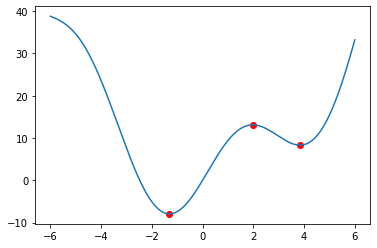

[-1.306440008369511, 3.837467106499049]


In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Cost function
f = lambda x: x**2 + 10*np.sin(x)
X = np.linspace(-6, 6, 100000)
Y = [f(x) for x in X]

# Optimal point solve by 
# https://www.wolframalpha.com
x = [-1.3064400083695109598,
     3.8374671064990487198,
     1.9773830293288409831]

plt.scatter(x, cost(x), c='red')
plt.plot(X, Y); plt.show(); print(x[0:2])

In [45]:
# Nesterov accelerated gradient
def nesterovGD(x0, eta, gamma, loop):
    x = [x0]
    v = [np.zeros_like(x0)]
    
    for it in range(loop):
        v_new = gamma*v[-1] + eta*(grad(x[-1] - gamma*v[-1]))
        x_new = x[-1] - v_new
        if np.linalg.norm(abs(grad(x_new))) / np.array(x0).size < 1e-3: break
        x.append(x_new)
        v.append(v_new)
    return (x, it)

In [46]:
(x, it) = nesterovGD(5.0, .1, .9, 1000)
print('optimal point : %f, cost : %f, after %d iterations'%(x[-1], cost(x[-1]), it))

optimal point : -1.306342, cost : -7.945823, after 19 iterations
